# Abalone Rings (Age) Prediction

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [22]:
# set path to dataset
fpath = 'dataset/abalone.data'

In [23]:
df = pd.read_csv(fpath, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
# data info is obtained from another folder
# map the column name to their dedicated column
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
print(df.shape)
print(df.describe())
print(df.dtypes)

(4177, 9)
            length     diameter  ...  shell_weight        rings
count  4177.000000  4177.000000  ...   4177.000000  4177.000000
mean      0.523992     0.407881  ...      0.238831     9.933684
std       0.120093     0.099240  ...      0.139203     3.224169
min       0.075000     0.055000  ...      0.001500     1.000000
25%       0.450000     0.350000  ...      0.130000     8.000000
50%       0.545000     0.425000  ...      0.234000     9.000000
75%       0.615000     0.480000  ...      0.329000    11.000000
max       0.815000     0.650000  ...      1.005000    29.000000

[8 rows x 8 columns]
sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


In [26]:
# look for missing values
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

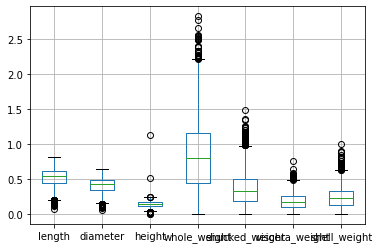

In [27]:
# look at skewness of all the features
df.drop('rings', axis=1).boxplot()

In [28]:
# define target and feature columns
target = 'rings'
features = list(df.columns)
features.remove(target)

In [29]:
# capping outliers
for f in features[1:]:
    upper_lim = df[f].quantile(0.75) + ((df[f].quantile(0.75) - df[f].quantile(0.25)) * 1.5)
    lower_lim = df[f].quantile(0.25) - ((df[f].quantile(0.75) - df[f].quantile(0.25)) * 1.5)
    
    df.loc[(df[f] > upper_lim), f] = upper_lim
    df.loc[(df[f] < lower_lim), f] = lower_lim

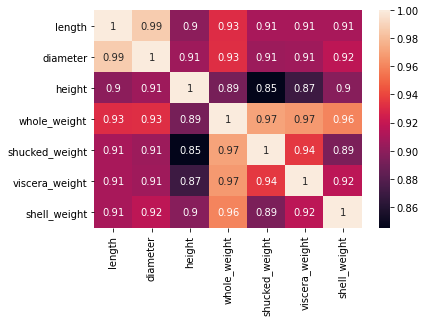

In [30]:
# look for correlation between features
sns.heatmap(df[features].corr(), annot=True)

## Based on the correlation matrix, these are concluded

### 1. It can be seen that diameter and length is highly correlated
### 2. Whole weight can represent the other weight features (shucked, viscera, shell)

In [31]:
# define X and y
y = df[target]
X = df[['length', 'height', 'whole_weight']]
X = pd.get_dummies(X)

In [32]:
# split dataset into train and test set
from sklearn.model_selection import train_test_split
test_size = 0.1
random_state = 1
np.random.seed(0)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1, test_size=0.1)

In [33]:
# scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

## ML Models that are tested

### 1. Random Forest
### 2. Decision Tree
### 3. Support Vector Machine
### 4. Linear Regression
### 5. Ridge Regression
### 6. Logistic Regression
### 7. XGBoost
### 8. Polynomial Regression
### 9. Deep Neural Network

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

# define all the models
models = [
    {'name': 'RF', 'model': RandomForestRegressor(random_state=random_state)},
    {'name': 'DT', 'model': DecisionTreeRegressor(random_state=random_state)},
    {'name': 'SVR', 'model': SVR()},
    {'name': 'Linear', 'model': LinearRegression()},
    {'name': 'Ridge', 'model': Ridge(random_state=random_state)},
    {'name': 'LogReg', 'model': LogisticRegression()},
    {'name': 'XGBoost', 'model': XGBRegressor(random_state=random_state)},
]

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# loop through all the models and calculate the MAE and RMSE Score on test set
for m in models:
    model = m['model']
    model.fit(train_X, train_y)
    
    preds = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds)
    mse = mean_squared_error(test_y, preds)
    
    print(m['name'])
    print('MAE Score: ', mae)
    print('RMSE Score: ', np.sqrt(mse))
    print('')

RF
MAE Score:  2.072405787195261
RMSE Score:  2.7948258109130153

DT
MAE Score:  2.5239234449760763
RMSE Score:  3.5692064173651774

SVR
MAE Score:  1.7785545102240108
RMSE Score:  2.595742068185085

Linear
MAE Score:  1.894972401180214
RMSE Score:  2.5632888058626286

Ridge
MAE Score:  1.894982588742873
RMSE Score:  2.563265378988897

LogReg
MAE Score:  1.8803827751196172
RMSE Score:  2.841086118886267

[15:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost
MAE Score:  1.8580872636092336
RMSE Score:  2.5263736826333227



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial model
model = LinearRegression()
poly = PolynomialFeatures(2)
X_train_transform = poly.fit_transform(train_X)
X_test_transform = poly.fit_transform(test_X)
model.fit(X_train_transform, train_y)

preds = model.predict(X_test_transform)

print('Polynomial Model')
print('MAE Score: ', mean_absolute_error(test_y, preds))
print('RMSE Score: ', np.sqrt(mean_squared_error(test_y, preds)))

Polynomial Model
MAE Score:  1.8413286970707998
RMSE Score:  2.503203002507605


In [37]:
import keras.layers as layers
import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping

from numpy.random import seed
seed(1)

# set early stopping to avoid overfitting
callbacks = [EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)]

# using Keras DNN for prediction
def build_model(lr=0.0001, epochs=500, batch_size=None, draw_loss=True):
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    # define optimizer
    optimizer = keras.optimizers.Adam(lr=lr)

    # compile model
    model.compile(loss='mse', optimizer=optimizer)
    
    # train the model
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=callbacks)

    # summarize history for loss score
    if draw_loss:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    
    # calculate the mae and rmse on test set
    preds = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds)
    rmse = np.sqrt(mean_squared_error(test_y, preds))
    
    return model, mae, rmse

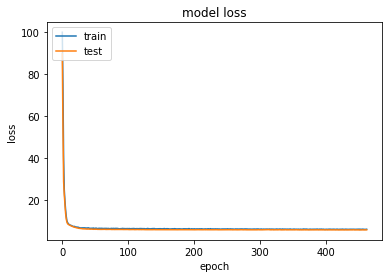

DNN Dense Model
MAE Score:  1.7982289517325076
RMSE Score:  2.4736305884328247


In [38]:
model, mae, rmse = build_model()

print('DNN Dense Model')
print('MAE Score: ', mae)
print('RMSE Score: ', rmse)

## Hyperparameter Tuning

In [39]:
# DNN Keras Dense Model perform the best
# Dense Model parameter will be tuned to achieve a better score
# baseline will be rmse score of 2.49325

In [40]:
lrs = [0.1, 0.01, 0.001, 0.0001]
n_epochs = [20, 50, 100, 200, 500, 600]
batch_sizes = [None, 32, 64, 128, 256, 512]
results = pd.DataFrame(columns=['parameters', 'mae', 'rmse'])

for lr in lrs:
    for epochs in n_epochs:
        for batch_size in batch_sizes:
            model, mae, rmse = build_model(lr=lr, epochs=epochs, batch_size=batch_size, draw_loss=False)
            results = results.append({
                'parameters': f'{lr}, {epochs}, {batch_size}',
                'mae': mae,
                'rmse':rmse
            }, ignore_index=True)

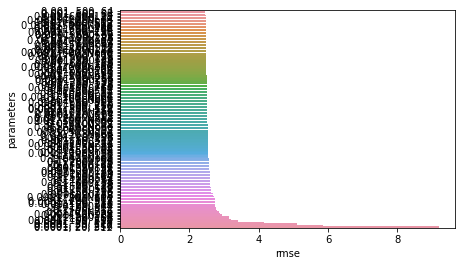

In [46]:
import seaborn as sns
results = results.sort_values(by=['rmse'])
sns.barplot(data=results, x='rmse', y='parameters')

In [68]:
parameters = results[results['rmse'] == results['rmse'].min()]['parameters'].values[0]
parameters = parameters.split(',')

print('Best parameter for Dense model achieve a score of ', results['rmse'].min())
print(f'Learning Rate: {parameters[0]}')
print(f'Number of epochs: {parameters[1]}')
print(f'Batch Size: {parameters[2]}')

Best parameter for Dense model achieve a score of  2.454786781550721
Learning Rate: 0.001
Number of epochs:  500
Batch Size:  64
